In [1]:
from model import *

In [2]:
# Imports
%matplotlib inline

import sys
import itertools
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots
from sklearn.metrics import accuracy_score, classification_report

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=1)

In [3]:
def create_sort_dataset(dataset_length, seq_length, max_number=999):
    x_train = np.random.randint(low=0, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_train = np.sort(x_train, axis=1)
    
    x_test = np.random.randint(low=0, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_test = np.sort(x_test, axis=1)
    
    return x_train, y_train, x_test, y_test

def create_dummy_dataset(dataset_length, seq_length, max_number):
    lower_bound = -1 * max_number
    x_train = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_train = np.where(x_train.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    x_test = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_test = np.where(x_test.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    return x_train, y_train, x_test, y_test
    

Epoch 1
Cross entropy loss:  2.381150662633217
Epoch 2
Cross entropy loss:  2.3096062810955202
Epoch 3
Cross entropy loss:  2.2694548411184887
Epoch 4
Cross entropy loss:  2.2414599814265057
Epoch 5
Cross entropy loss:  2.21944265481155
Epoch 6
Cross entropy loss:  2.2006742649445155
Epoch 7
Cross entropy loss:  2.183693505046003
Epoch 8
Cross entropy loss:  2.1677111003907554
Epoch 9
Cross entropy loss:  2.152370403043414
Epoch 10
Cross entropy loss:  2.137482393351536
Epoch 11
Cross entropy loss:  2.122879340732867
Epoch 12
Cross entropy loss:  2.1084068436597754
Epoch 13
Cross entropy loss:  2.093936368501044
Epoch 14
Cross entropy loss:  2.0793739060039402
Epoch 15
Cross entropy loss:  2.064663834609707
Epoch 16
Cross entropy loss:  2.0497910738776457
Epoch 17
Cross entropy loss:  2.0347848709939047
Epoch 18
Cross entropy loss:  2.0197087260401845
Epoch 19
Cross entropy loss:  2.0046326377769814
Epoch 20
Cross entropy loss:  1.9896144865295513
Epoch 21
Cross entropy loss:  1.974699

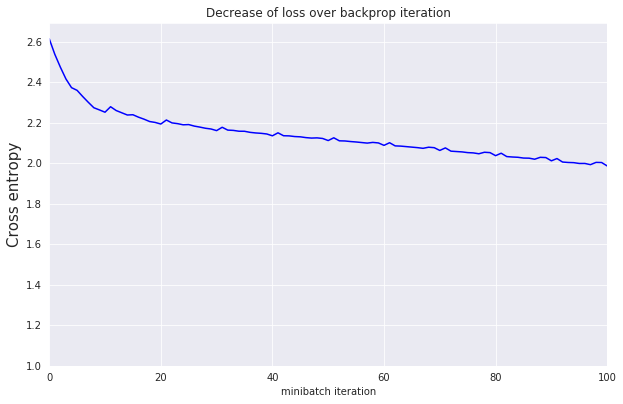

In [4]:
# Set hyper-parameters
lmbd = 0.5  # Rmsprop lambda
learning_rate = 0.001  # Learning rate
momentum_term = 0.80  # Momentum term
eps = 1e-6  # Numerical stability term to prevent division by zero
batch_size = 20  # Size of the minibatches (number of samples)
max_num = 8
seq_length = 9
hidden_size = 30
nb_train = 200

x_train, y_train, x_test, y_test = create_sort_dataset(nb_train, seq_length, max_num)

input_size = 1
output_size = max_num+1

# Create the network
model = ModelSort(1, max_num + 1, hidden_size, seq_length)
#RNN = RnnBinaryAdder(1, output_size, hidden_size, seq_length)
# Set the initial parameters
# Number of parameters in the network
nbParameters =  sum(1 for _ in model.get_params_iter())
# Rmsprop moving average
maSquare = [0.0 for _ in range(nbParameters)]
Vs = [0.0 for _ in range(nbParameters)]  # Momentum

# Create a list of minibatch losses to be plotted
ls_of_loss = [
    model.loss(model.predict_proba(x_train[:batch_size]), y_train[:batch_size])]

# Iterate over some iterations
for i in range(90):
    print(f'Epoch {i+1}')
    # Iterate over all the minibatches
    for mb in range(nb_train // batch_size):
        x_batch = x_train[mb:mb + batch_size]  # Input minibatch
        y_batch = y_train[mb:mb + batch_size]  # Target minibatch
        model.train_on_batch(x_batch, y_batch)
        # linear_out, rnn_states, out, probabilities = model.forward(x_batch)
        # model.backward(x_batch, probabilities, linear_out, rnn_states, y_batch)

        ls_of_loss.append(model.loss(model.predict_proba(x_batch), y_batch))


        # V_tmp = [v * momentum_term for v in Vs]
        # Update each parameters according to previous gradient
        # for pIdx, P in enumerate(model.get_params_iter()):
        #     P += V_tmp[pIdx]
        # Get gradients after following old velocity
        # Get the parameter gradients
        # backprop_grads = model.getParamGrads(x_batch, y_batch)
        # # Update each parameter seperately
        # for pIdx, P in enumerate(model.get_params_iter()):
        #     P -= learning_rate * backprop_grads[pIdx]
            # Update the Rmsprop moving averages
            # maSquare[pIdx] = lmbd * maSquare[pIdx] + (
            #     1-lmbd) * backprop_grads[pIdx]**2
            # # Calculate the Rmsprop normalised gradient
            # pGradNorm = ((
            #     learning_rate * backprop_grads[pIdx]) / np.sqrt(
            #     maSquare[pIdx]) + eps)
            # # Update the momentum
            # Vs[pIdx] = V_tmp[pIdx] - pGradNorm
            # P -= pGradNorm   # Update the parameter
        # Add loss to list to plot




    print("Cross entropy loss: ", np.mean(ls_of_loss))
    
# Plot the loss over the iterations
fig = plt.figure(figsize=(10, 7))
plt.plot(ls_of_loss, 'b-')
plt.xlabel('minibatch iteration')
plt.ylabel('Cross entropy', fontsize=15)
plt.title('Decrease of loss over backprop iteration')
plt.xlim(0, 100)
fig.subplots_adjust(bottom=0.2)
plt.show()